In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

import pickle

import re
import string
import urllib.request
from nltk.corpus import stopwords

In [2]:
df = pickle.load( open("tmdb4700.pkl", "rb"))

In [3]:
df.iloc[0]

id                                                          19995
title                                                      Avatar
popularity                                                150.438
vote_average                                                  7.2
vote_count                                                  11800
runtime                                                       162
release_date                                           2009-12-10
genres              [Action, Adventure, Fantasy, Science Fiction]
keywords        [culture clash, future, space war, space colon...
director                                          [James Cameron]
producer                              [James Cameron, Jon Landau]
screenplay                                        [James Cameron]
writer                                            [James Cameron]
budget                                                  237000000
profit_ratio                                              10.7636
Name: 0, d

Text(0.5, 1.0, 'Distribución de Puntuación')

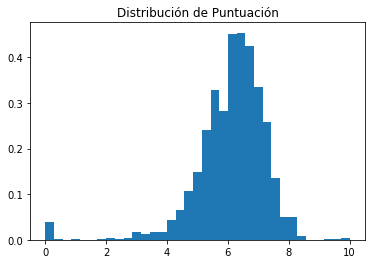

In [4]:
plt.hist(df.vote_average, bins=35, density=True)
plt.title("Distribución de Puntuación")

In [5]:
genres_list     = []
keyword_list    = []
producer_list   = []
director_list   = []
writer_list     = []
screenplay_list = []


def append_to_list(in_list, target_list):
    target_list.extend(in_list)

get_genres_list     = lambda x: append_to_list(x, genres_list)
get_keyword_list    = lambda x: append_to_list(x, keyword_list)
get_producer_list   = lambda x: append_to_list(x, producer_list)
get_director_list   = lambda x: append_to_list(x, director_list)
get_writer_list     = lambda x: append_to_list(x, writer_list)
get_screenplay_list = lambda x: append_to_list(x, screenplay_list)

df.genres.apply(get_genres_list)
genres_set = set(genres_list)

df.keywords.apply(get_keyword_list)
keyword_set = set(keyword_list)

df.producer.apply(get_producer_list)
producer_set = set(keyword_list)

df.director.apply(get_director_list)
director_set = set(director_list)

df.writer.apply(get_writer_list)
writer_set = set(writer_list)

df.screenplay.apply(get_screenplay_list)
screenplay_set = set(screenplay_list)

In [6]:
len(director_set)

2499

In [7]:
len(keyword_set)

9750

In [8]:
len(screenplay_set)

2950

In [12]:
def join_list_into_str(x):
    return ' '.join(x)

genres_list = lambda x: join_list_into_str(x)

In [13]:
df["genres_str"] = 

,id,title,popularity,vote_average,vote_count,runtime,release_date,genres,keywords,director,producer,screenplay,writer,budget,profit_ratio
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",[James Cameron],"[James Cameron, Jon Landau]",[James Cameron],[James Cameron],237000000,10.763566
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,169.0,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Ted Elliott, Terry Rossio]",[],300000000,2.203333
2,206647,Spectre,107.376788,6.3,4466,148.0,2015-10-26,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[John Logan, Robert Wade, Neal Purvis, Jez But...",[],245000000,2.594590
3,49026,The Dark Knight Rises,112.312950,7.6,9106,165.0,2012-07-16,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christopher Nolan, Jonathan Nolan]",[],250000000,3.339756
4,49529,John Carter,43.926995,6.1,2124,132.0,2012-03-07,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Andrew Stanton, Michael Chabon, Mark Andrews]",[],260000000,0.092843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,21334,Children of Heaven,7.072118,7.8,112,89.0,1997-08-01,"[Drama, Comedy, Family]","[brother sister relationship, class, foot race]",[Majid Majidi],[],[],[Majid Majidi],180000,4.000000
4696,79120,Weekend,1.041254,7.4,163,96.0,2011-09-22,"[Drama, Romance]","[gay, great britain, one-night stand, independ...",[Andrew Haigh],[],[],[Andrew Haigh],8000,57.743375
4697,27995,She's Gotta Have It,6.722213,6.1,25,84.0,1986-08-08,"[Comedy, Romance]","[independent film, lesbian]",[Spike Lee],[Spike Lee],[],[Spike Lee],0,NaN
4698,253290,Butterfly Girl,0.015189,0.0,0,77.0,2014-03-10,[Documentary],[woman director],[Cary Bell],"[Jessica Miller, Cary Bell, Susan Grossman]",[],[],0,NaN
